In [56]:
# import pandas as pd
# import numpy as np
# import datetime as dt
# import matplotlib.pyplot as plt
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 10, 6

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import functools
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

Year
1999    51.418919
2000    51.526316
2001    51.986667
2002    54.647887
2003    52.432432
Name: Deaths, dtype: float64

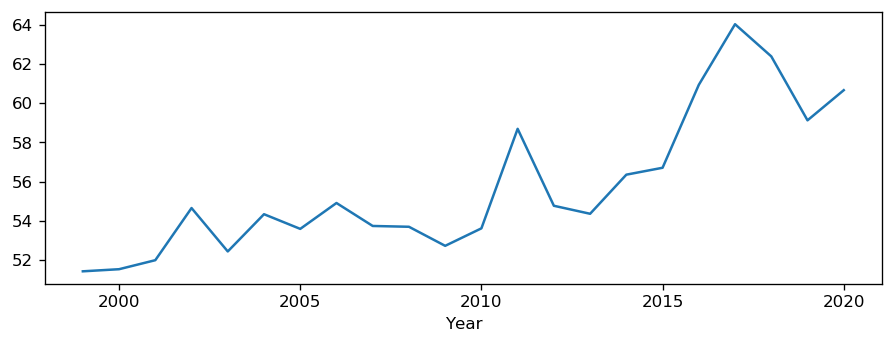

In [57]:
df = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
suicide = df[(df['Ten-Year Age Groups'] == '5-14 years') | (df['Ten-Year Age Groups'] == '15-24 years')]
series = suicide.groupby('Year')['Deaths'].mean()
series.plot()
series.head()

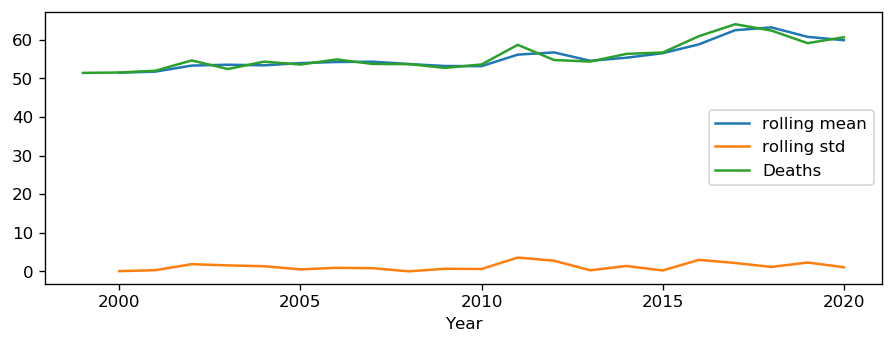

In [58]:
timeseries = series
timeseries.rolling(2).mean().plot(label='rolling mean')
timeseries.rolling(2).std().plot(label='rolling std')
timeseries.plot()
plt.legend()

In [59]:
from statsmodels.tsa.stattools import adfuller

def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print(label+':'+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")
        
check_adf(series)

ADF Test:
ADF Statistic:-1.3971474523698932
p-value:0.583642899087013
No. of Lags Used:0
Number of Observations Used:21
Fail to reject H0 thereby data is non-stationary 


Year
2017     NaN
2019    -1.0
1999     3.0
1999    63.0
2000   -13.0
        ... 
2016   -10.0
2017     6.0
2018     0.0
2019    -1.0
2020    -1.0
Name: Deaths First Difference, Length: 1874, dtype: float64
ADF Test:
ADF Statistic:-33.64487921950433
p-value:0.0
No. of Lags Used:2
Number of Observations Used:1870
Reject null hypothesis and data is stationary


C:\Users\dania\Project\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


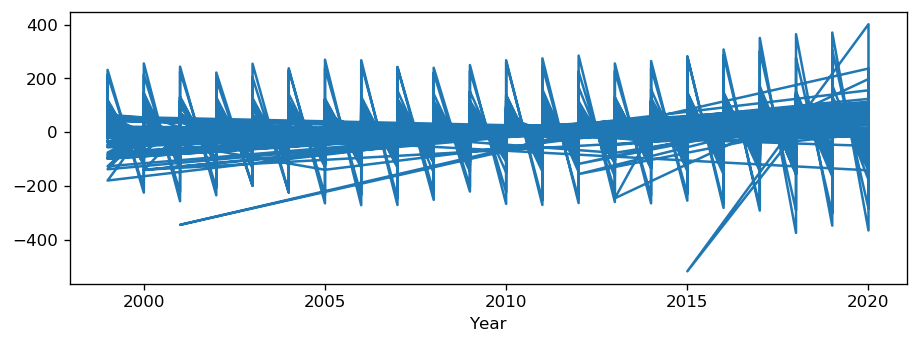

In [65]:
#something = series['Deaths First Difference']
suicide['Deaths First Difference'] = suicide['Deaths'] - suicide['Deaths'].shift(1)
print(suicide['Deaths First Difference'])
check_adf(suicide['Deaths First Difference'].dropna()) #['Deaths First Difference'].dropna())
suicide['Deaths First Difference'].plot()

In [ ]:
# suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
# print(suicide)
# suicide['Year'] = pd.to_datetime(suicide['Year'], infer_datetime_format=True)
# indexedSuicide = suicide.set_index(['Year'])

In [ ]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
series = suicide.groupby('Year')['Deaths'].mean()
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
model_fit.plot_predict(dynamic=False)

In [19]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
#series = suicide.groupby('Year')['Deaths'].mean()
#print(series)

#df = suicide[['State', 'Year','Ten-Year Age Groups', 'Gender', 'Crude Rate', 'Population','Deaths']]

#df = df[(df['Ten-Year Age Groups'] == '5-14 years') | (df['Ten-Year Age Groups'] == '5-14 years')]

# print(suicide[suicide['Ten-Year Age Groups'] == '5-14 years'])

suicide = suicide[(suicide['Ten-Year Age Groups'] == '5-14 years') | (suicide['Ten-Year Age Groups'] == '15-24 years')]
series = suicide.groupby('Year')['Deaths'].mean()
result = adfuller(series)
#result = adfuller(suicide['Deaths'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.397147
p-value: 0.583643


In [ ]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)

class(dat$suicide)

In [18]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(suicide.groupby('Year')['Deaths'].mean(), order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\dania\Project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\dania\Project\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\dania\Project\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\dania\Project\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


LinAlgError: SVD did not converge

TypeError: unsupported operand type(s) for -: 'str' and 'str'

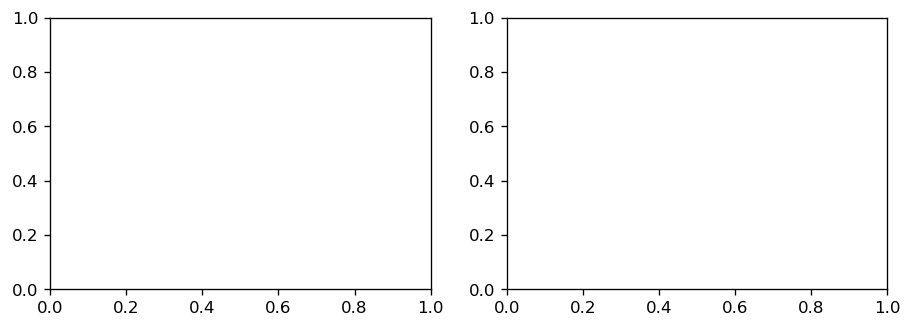

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(suicide.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(suicide.diff().dropna(), ax=axes[1])

plt.show()